### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Driver Dataset
Source: https://raw.githubusercontent.com/datascienceinc/learn-data-science/master/Introduction-to-K-means-Clustering/Data/data_1024.csv

In [2]:
drivers_data = pd.read_csv('dataset/driver_dataset.csv', sep='\t')

drivers_data.head(10)

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0
5,3423313857,41.91,10.0
6,3423312432,58.64,20.0
7,3423311434,52.02,8.0
8,3423311328,31.25,34.0
9,3423312488,44.31,19.0


In [3]:
drivers_data.shape

(4000, 3)

In [4]:
drivers_data = drivers_data.sample(frac=1)

##### Dropping the ID column

In [24]:
drivers_data.drop('Driver_ID', axis=1, inplace=True)

drivers_data.sample(10)

,Distance_Feature,Speeding_Feature
2586,47.04,4.0
2823,52.60,4.0
2825,64.98,3.0
1455,36.19,2.0
1327,56.57,8.0
371,63.20,40.0
2389,54.92,2.0
3106,45.03,11.0
1746,51.67,5.0
29,56.04,39.0


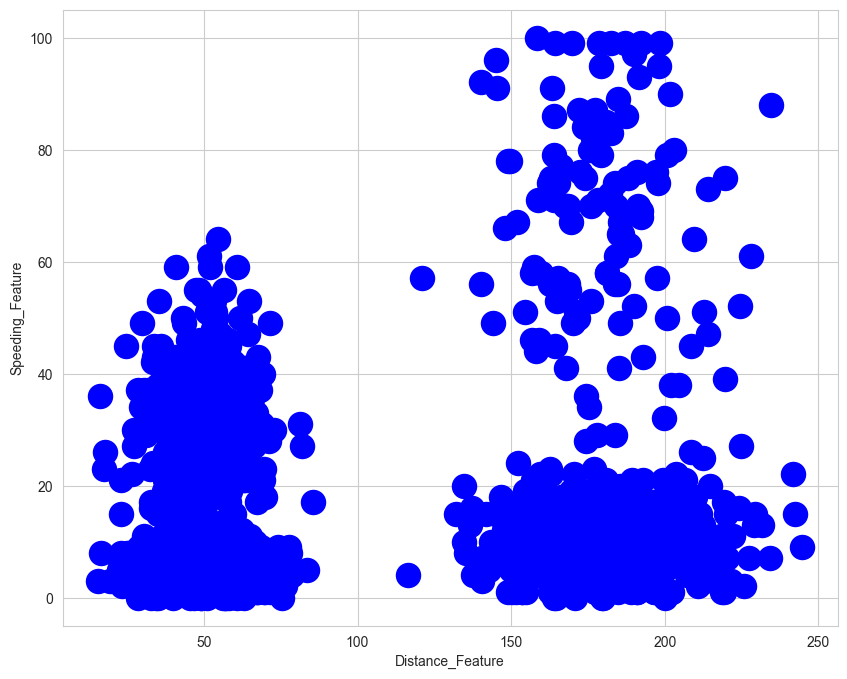

In [5]:
fig, ax = plt.subplots(figsize=(10, 8))

plt.scatter(drivers_data['Distance_Feature'], 
            drivers_data['Speeding_Feature'], 
            s = 300, 
            c='blue')

plt.xlabel('Distance_Feature')
plt.ylabel('Speeding_Feature')

plt.show()

### Kmeans
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


In [6]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=4, max_iter=1000).fit(drivers_data)

## For recording start with 4, then 3 then 2 and change this code and hit shift-enter
# kmeans_model = KMeans(n_clusters=3, max_iter=1000).fit(drivers_data)
# kmeans_model = KMeans(n_clusters=2, max_iter=1000).fit(drivers_data)

In [7]:
kmeans_model.labels_[::40]

array([2, 1, 3, 0, 2, 3, 1, 3, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 2, 2, 1, 1,
       1, 0, 1, 3, 3, 0, 3, 0, 0, 1, 0, 1, 1, 2, 2, 1, 0, 2, 0, 2, 2, 1,
       0, 1, 3, 1, 1, 3, 0, 0, 1, 2, 0, 1, 2, 3, 0, 0, 2, 0, 2, 1, 3, 2,
       2, 2, 3, 2, 1, 3, 1, 0, 1, 2, 2, 1, 3, 3, 0, 1, 2, 0, 3, 0, 3, 2,
       1, 2, 0, 3, 2, 2, 3, 1, 2, 3, 3, 0], dtype=int32)

In [8]:
np.unique(kmeans_model.labels_)

array([0, 1, 2, 3], dtype=int32)

In [10]:
zipped_list = list(zip(np.array(drivers_data), kmeans_model.labels_))

zipped_list[1000:1010]

[(array([3.42331112e+09, 1.95870000e+02, 3.00000000e+00]), np.int32(3)),
 (array([3.42331344e+09, 4.63300000e+01, 2.00000000e+00]), np.int32(0)),
 (array([3.42331209e+09, 2.75900000e+01, 7.00000000e+00]), np.int32(1)),
 (array([3.42331318e+09, 5.51100000e+01, 3.00000000e+00]), np.int32(2)),
 (array([3.42331364e+09, 1.42830000e+02, 5.00000000e+00]), np.int32(0)),
 (array([3.42331183e+09, 1.85370000e+02, 1.40000000e+01]), np.int32(1)),
 (array([3.42331239e+09, 5.75800000e+01, 3.50000000e+01]), np.int32(1)),
 (array([3.42331106e+09, 1.59800000e+02, 5.80000000e+01]), np.int32(3)),
 (array([3.42331357e+09, 1.94680000e+02, 2.00000000e+00]), np.int32(0)),
 (array([3.42331244e+09, 1.81670000e+02, 8.00000000e+00]), np.int32(2))]

In [11]:
centroids = kmeans_model.cluster_centers_

centroids

array([[3.42331394e+09, 7.52935882e+01, 1.10950980e+01],
       [3.42331192e+09, 7.78594254e+01, 1.09879032e+01],
       [3.42331292e+09, 7.37419246e+01, 1.06577381e+01],
       [3.42331094e+09, 7.73451224e+01, 1.01265306e+01]])

##### plotting centroids along with data points

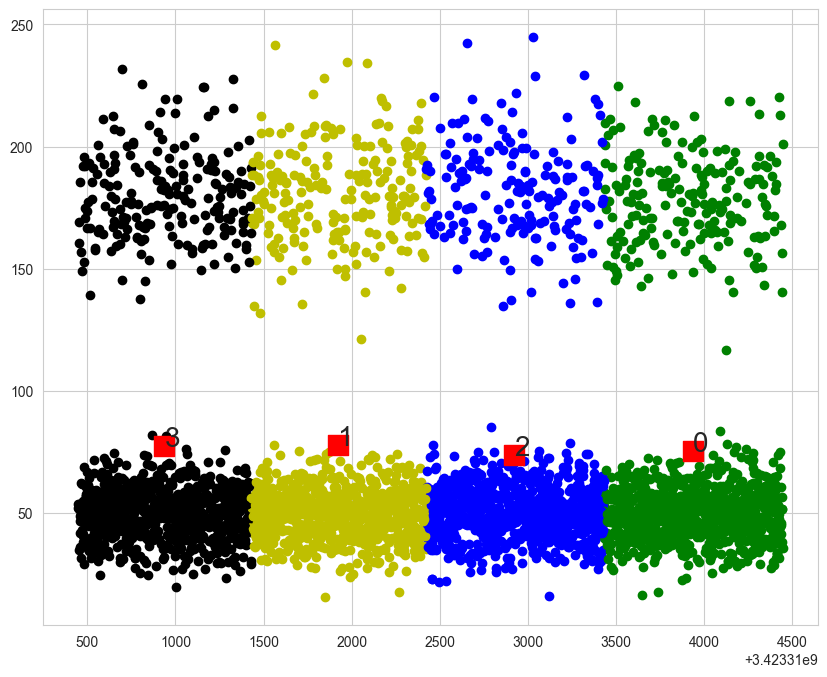

In [12]:
colors = ['g', 'y', 'b', 'k']
    
plt.figure(figsize=(10, 8))

for element in zipped_list:
    plt.scatter(element[0][0], element[0][1], 
                c=colors[(element[1] % len(colors))])
    
plt.scatter(centroids[:,0], centroids[:,1], c='r', s=200, marker='s')

for i in range(len(centroids)):
    plt.annotate( i, (centroids[i][0], centroids[i][1]), fontsize=20)

##### with no of clusters = 4 silhouette score decreased

In [13]:
from sklearn.metrics import silhouette_score

print("Silhouette score: ", silhouette_score(drivers_data, kmeans_model.labels_))

Silhouette score:  0.5581099808497987
